VAR : capture the relationship between multiple features as they change over time 

In [35]:
# necessary lib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


In [36]:
# reading data 
df= pd.read_excel('final.xlsx',index_col=1,parse_dates=True)

In [37]:
df.head()

,Unnamed: 0,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Zip,Income,lat,lng
Day,,,,,,,,,,,,,,,,,
2019-01-02,0,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,0.3500,0.0935,0.5565,92392,104993.5,34.479332,-117.397422
2019-01-03,1,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,0.5233,0.1120,0.3647,90003,40865.2,33.963074,-118.274809
2019-01-04,2,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,0.6041,0.2028,0.1931,92201,91188.0,33.711551,-116.236141
2019-01-05,3,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,0.7161,0.1884,0.0955,92625,55627.0,33.601873,-117.866850
2019-01-06,4,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,0.7447,0.2129,0.0424,92596,12713.0,33.638018,-117.088880


In [38]:
# droping unwanted columns

df=df.drop(['Unnamed: 0','Zip'],axis=1)

In [39]:
df.head()

,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Income,lat,lng
Day,,,,,,,,,,,,,,,
2019-01-02,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,0.3500,0.0935,0.5565,104993.5,34.479332,-117.397422
2019-01-03,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,0.5233,0.1120,0.3647,40865.2,33.963074,-118.274809
2019-01-04,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,0.6041,0.2028,0.1931,91188.0,33.711551,-116.236141
2019-01-05,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,0.7161,0.1884,0.0955,55627.0,33.601873,-117.866850
2019-01-06,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,0.7447,0.2129,0.0424,12713.0,33.638018,-117.088880


In [40]:
# visulaizing each feature

color_list= [ 'blue','green','orange','yellow','red','purple','brown','pink','gray','olive','cyan','magenta','black','indigo','aqua']


def vis(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size= len(features)
    fig,axes=plt.subplots(nrows= int(np.ceil(feature_size/2)),ncols=2,figsize= (14,feature_size*2),dpi=80,facecolor='w',edgecolor='k')
    
    for i in range(feature_size):
        key= features[i]
        c= color_list[i% (len(color_list))]
        t_data=data[key]
        t_data.head()
        
        
        ax=t_data.plot(ax= axes[i//2,i%2],color=c,title="{}".format(key),rot=25)
        
        ax.legend([key])
    plt.tight_layout()

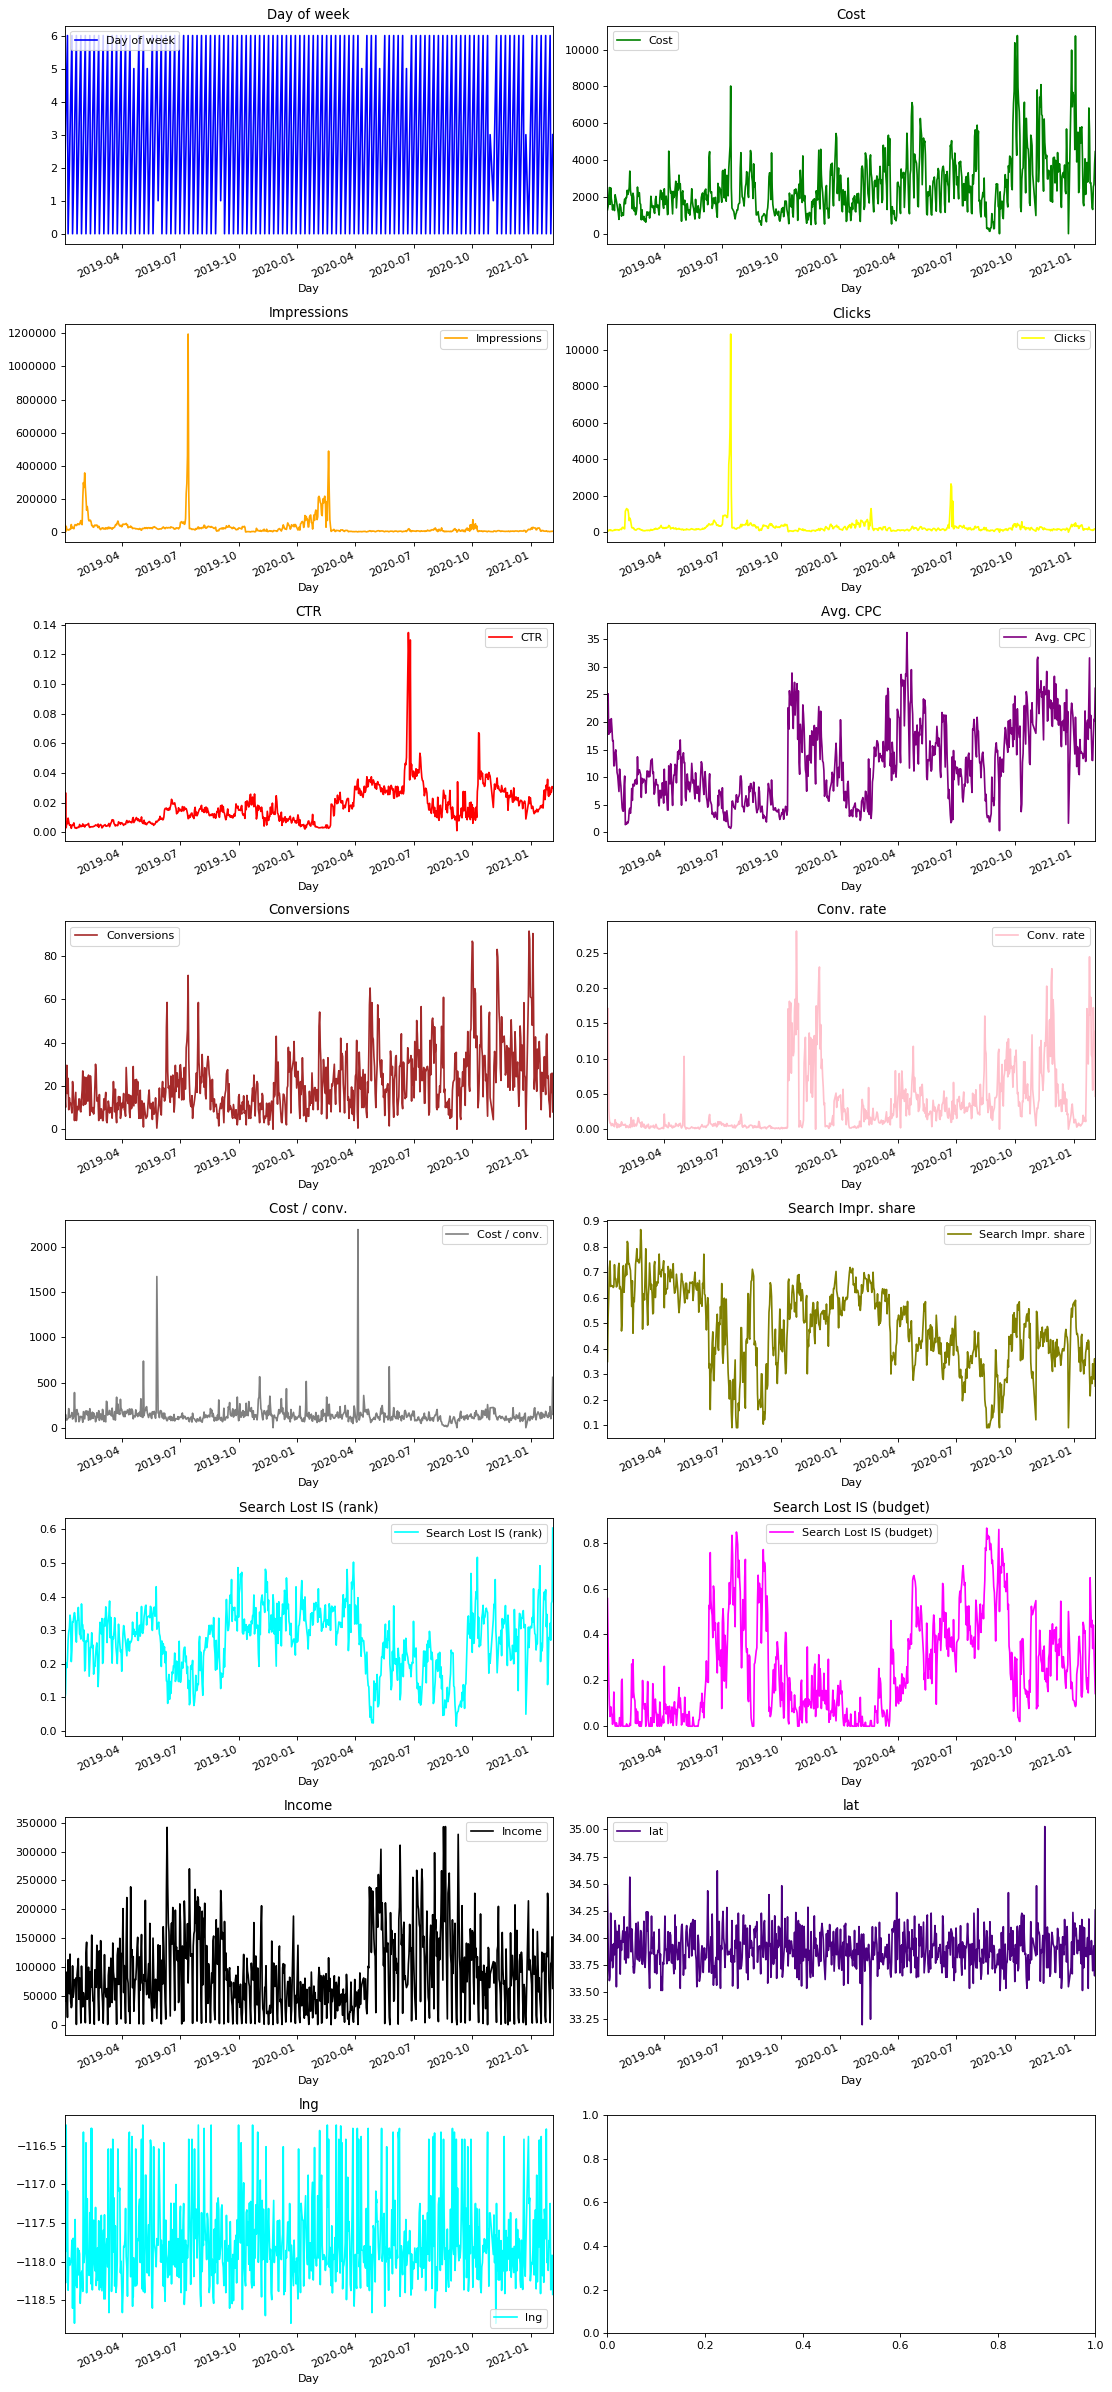

In [41]:
vis(df)

# Augmented Dickey Fuller test

It is used to test time series is stationary or not 

It's statistical test 

Null Hypothesis : Series possesses a unit root and hence series is Not stationary

Alternate Hypothesis : Series is Stationary

In [42]:
# null hypothesis checking 

for i in range(len(df.columns)):
    result= adfuller(df[df.columns[i]])
    
    if result[1]>0.05:
        print(' {} : Series is not stationary'.format(df.columns[i]))
    else:
        print(' {} : Series is stationary'.format(df.columns[i]))

 Day of week : Series is stationary
 Cost : Series is stationary
 Impressions : Series is stationary
 Clicks : Series is stationary
 CTR : Series is stationary
 Avg. CPC : Series is stationary
 Conversions : Series is stationary
 Conv. rate : Series is stationary
 Cost / conv. : Series is stationary
 Search Impr. share : Series is not stationary
 Search Lost IS (rank) : Series is stationary
 Search Lost IS (budget) : Series is not stationary
 Income : Series is stationary
 lat : Series is stationary
 lng : Series is stationary


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE512DE710>,
      dtype=object)

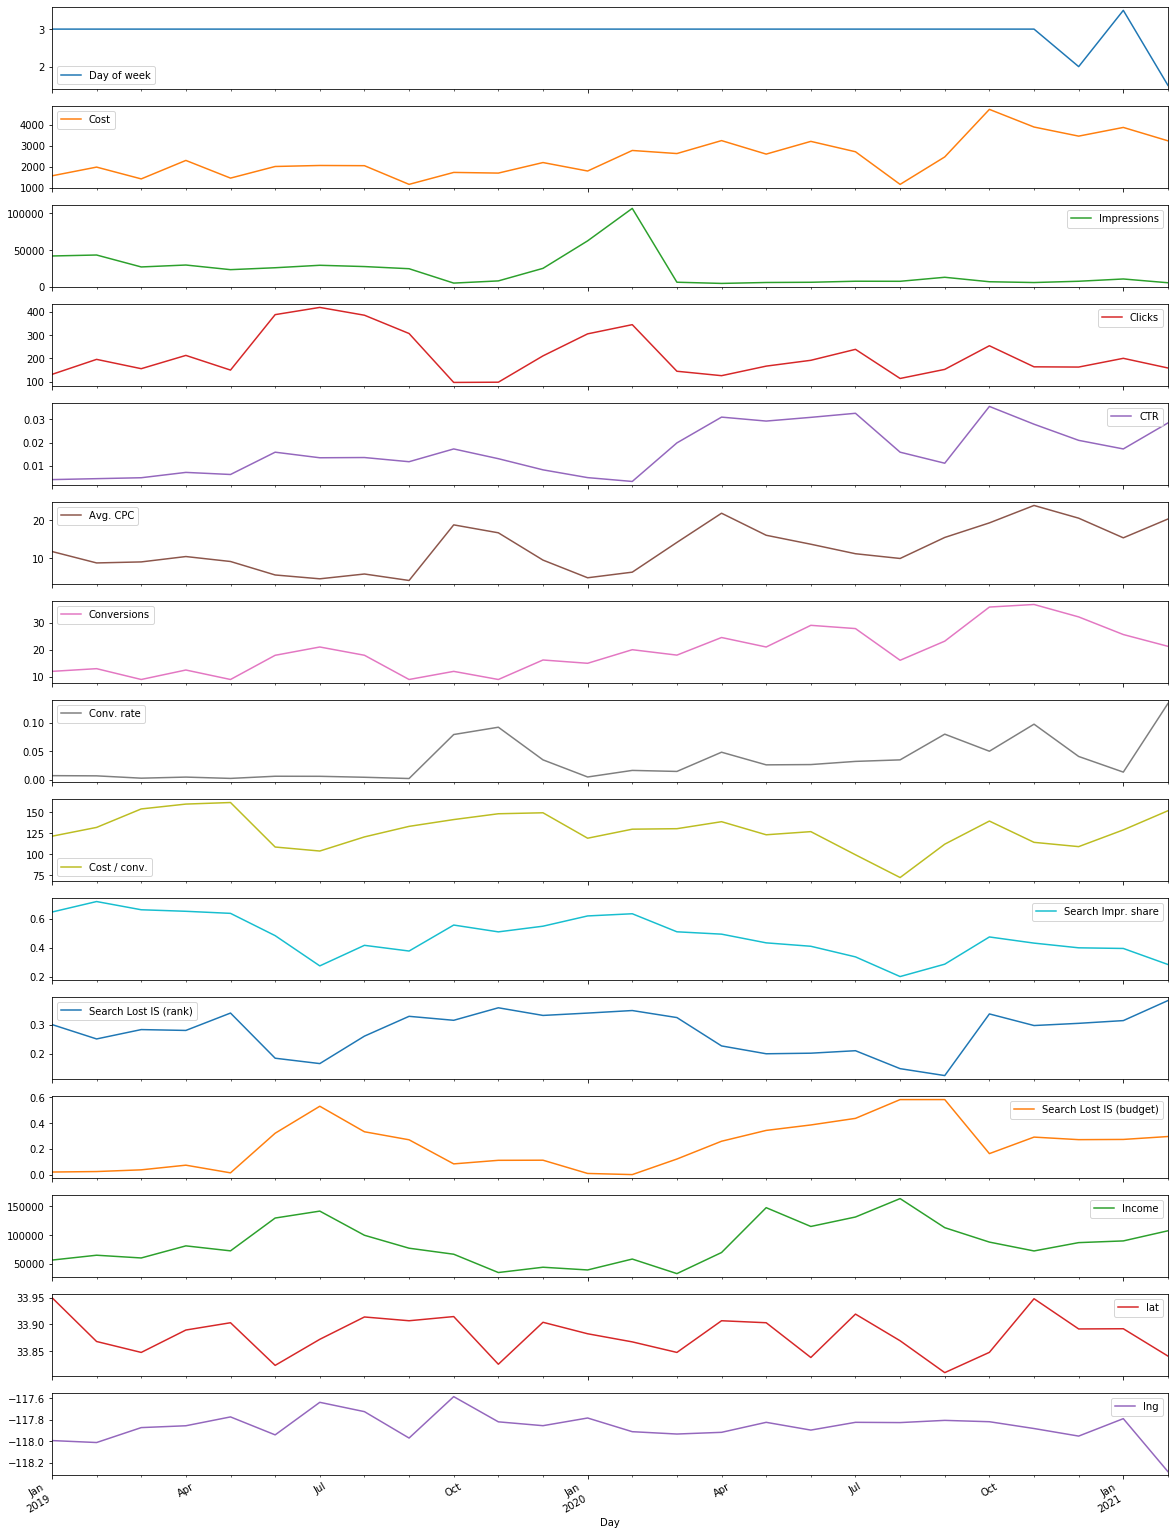

In [43]:


df.resample('M').median().plot(subplots=True,figsize=(20,30))

In [44]:
df.columns

Index(['Day of week', 'Cost', 'Impressions', 'Clicks', 'CTR', 'Avg. CPC',
       'Conversions', 'Conv. rate', 'Cost / conv.', 'Search Impr. share',
       'Search Lost IS (rank)', 'Search Lost IS (budget)', 'Income', 'lat',
       'lng'],
      dtype='object')

In [46]:
df['Search Impr. share']=df['Search Impr. share']-df['Search Impr. share'].shift(1)

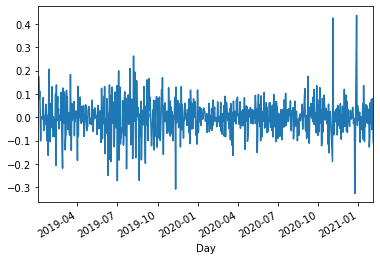

In [47]:
df['Search Impr. share'].plot()

In [48]:
df['Search Lost IS (budget)']=df['Search Lost IS (budget)']-df['Search Lost IS (budget)'].shift(1)

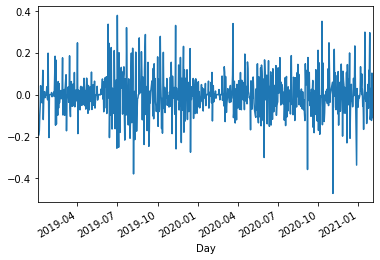

In [49]:
df['Search Lost IS (budget)'].plot()

In [58]:
df['Search Impr. share']=df['Search Impr. share'].fillna(0.1733)

In [59]:
df['Search Lost IS (budget)']=df['Search Lost IS (budget)'].fillna(-0.1918)

In [60]:
# again doing null hypothesis checking 

for i in range(len(df.columns)):
    result= adfuller(df[df.columns[i]])
    
    if result[1]>0.05:
        print(' {} : Series is not stationary'.format(df.columns[i]))
    else:
        print(' {} : Series is stationary'.format(df.columns[i]))

 Day of week : Series is stationary
 Cost : Series is stationary
 Impressions : Series is stationary
 Clicks : Series is stationary
 CTR : Series is stationary
 Avg. CPC : Series is stationary
 Conversions : Series is stationary
 Conv. rate : Series is stationary
 Cost / conv. : Series is stationary
 Search Impr. share : Series is stationary
 Search Lost IS (rank) : Series is stationary
 Search Lost IS (budget) : Series is stationary
 Income : Series is stationary
 lat : Series is stationary
 lng : Series is stationary


Now everything is stationary

# Granger causality test

if a signal X1(independet features)  "Granger-causes" (or "G-causes") a signal X2(dependent feature), then past values of X1 should contain information that helps predict X2

Checking relation between input and output variable

In [106]:
max_lags=7
y= "Income"

In [107]:
for i in range(len(df.columns)):
    results=grangercausalitytests(df[[y,df.columns[i]]],max_lags,verbose=False)
    p_values= [round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('column- {} : P_Values - {}'.format(df.columns[i],p_values))
    

column- Day of week : P_Values - [0.0902, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0]
column- Cost : P_Values - [0.2081, 0.002, 0.0012, 0.0029, 0.0053, 0.004, 0.0303]
column- Impressions : P_Values - [0.6133, 0.6948, 0.6578, 0.5542, 0.6912, 0.7042, 0.5035]
column- Clicks : P_Values - [0.1384, 0.1131, 0.2585, 0.4034, 0.5682, 0.6145, 0.5]
column- CTR : P_Values - [0.0001, 0.0003, 0.0028, 0.0084, 0.0162, 0.0574, 0.2102]
column- Avg. CPC : P_Values - [0.1036, 0.1339, 0.1718, 0.1275, 0.2319, 0.4259, 0.1127]
column- Conversions : P_Values - [0.0232, 0.0684, 0.1063, 0.1635, 0.0945, 0.0233, 0.0047]
column- Conv. rate : P_Values - [0.3149, 0.1365, 0.2529, 0.2415, 0.381, 0.317, 0.2286]
column- Cost / conv. : P_Values - [0.7913, 0.2779, 0.5765, 0.5419, 0.6904, 0.961, 0.955]
column- Search Impr. share : P_Values - [0.9857, 0.5591, 0.4779, 0.3446, 0.2532, 0.0334, 0.0071]
column- Search Lost IS (rank) : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
column- Search Lost IS (budget) : P_Values - [0.2704, 0.6229,

In [108]:
df_input=df[['Income','Day of week','Cost','CTR','Search Lost IS (rank)']]

In [109]:
df_input.head()


,Income,Day of week,Cost,CTR,Search Lost IS (rank)
Day,,,,,
2019-01-02,104993.5,2,1298.05,0.0012,0.0935
2019-01-03,40865.2,3,1480.26,0.0266,0.1120
2019-01-04,91188.0,4,1953.52,0.0030,0.2028
2019-01-05,55627.0,5,2507.57,0.0068,0.1884
2019-01-06,12713.0,6,1591.91,0.0058,0.2129


In [110]:
# splitting the train and test 

df_train= df_input[:int(0.9*(len(df_input)))]
df_test= df_input[int(0.9*(len(df_input))):]

In [111]:
df_train.shape

(682, 5)

In [112]:
df_test.shape

(76, 5)

In [113]:
model = VAR(df_train)

for i in range(30):
    results=model.fit(i+1)
    print('Order= ',i+1)
    print('AIC :',results.aic)
    print('BIC: ',results.bic)

C:\Users\vksva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Order=  1
AIC : 20.594053113879394
BIC:  20.793328986396993
Order=  2
AIC : 20.19140839674712
BIC:  20.557165902481472
Order=  3
AIC : 19.97029677780529
BIC:  20.502917823762136
Order=  4
AIC : 19.778782431061227
BIC:  20.478650373883855
Order=  5
AIC : 19.523904166007085
BIC:  20.391403819594377
Order=  6
AIC : 19.365365933902382
BIC:  20.400883577077913
Order=  7
AIC : 19.019096163350927
BIC:  20.2230195475836
Order=  8
AIC : 19.00368037903785
BIC:  20.37639873621444
Order=  9
AIC : 19.00734619063056
BIC:  20.549250240880614
Order=  10
AIC : 19.03809210862348
BIC:  20.749574068196996
Order=  11
AIC : 19.056715332987327
BIC:  20.938168922185646
Order=  12
AIC : 19.073799286495618
BIC:  21.12561973765596
Order=  13
AIC : 19.10819036142388
BIC:  21.330774426957984
Order=  14
AIC : 19.1503509265432
BIC:  21.544096887030488
Order=  15
AIC : 19.17030466337479
BIC:  21.735612335710528
Order=  16
AIC : 19.208786026321576
BIC:  21.94605677192046
Order=  17
AIC : 19.25169082994132
BIC:  22.161

In [114]:
model.select_order(30).summary()

,AIC,BIC,FPE,HQIC
0,24.15,24.18,3.072e+10,24.16
1,20.68,20.89,9.572e+08,20.76
2,20.29,20.67,6.504e+08,20.44
3,20.08,20.63,5.242e+08,20.29
4,19.88,20.61,4.324e+08,20.16
5,19.64,20.53,3.381e+08,19.98
6,19.49,20.56,2.919e+08,19.90
7,19.15,20.39*,2.074e+08,19.63*
8,19.13*,20.54,2.040e+08*,19.68
9,19.14,20.72,2.052e+08,19.75


In [122]:
model_2=VAR(df_train)
results_2= model.fit(7)

C:\Users\vksva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [123]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 10, Feb, 2021
Time:                     17:17:10
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    24.8872
Nobs:                     652.000    HQIC:                   21.7113
Log likelihood:          -10292.7    FPE:                3.74903e+08
AIC:                      19.6994    Det(Omega_mle):     1.32306e+08
--------------------------------------------------------------------
Results for equation Income
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                        142739.118478     69488.865856            2.054           0.040
L1.Income                         0.165030         0.048435            3.407           0.001
L1.Day of w

In [124]:
lag= results_2.k_ar

In [125]:
lag

7

In [146]:
results_2.forecast(df_train.values[-lag:],steps=5)

array([[7.53029794e+04, 3.98908331e+00, 4.17968527e+03, 2.86725907e-02,
        3.33797031e-01],
       [5.53156606e+04, 4.78406289e+00, 3.15790840e+03, 2.68331249e-02,
        2.92120228e-01],
       [1.10269954e+04, 5.48742580e+00, 3.06368674e+03, 2.88889573e-02,
        3.07288723e-01],
       [1.05523699e+05, 8.61462386e-01, 4.22013304e+03, 2.84196688e-02,
        2.90365284e-01],
       [1.09093993e+05, 1.14118551e+00, 4.02355210e+03, 2.78510392e-02,
        2.98217175e-01]])

In [147]:
df_test[0:5]

,Income,Day of week,Cost,CTR,Search Lost IS (rank)
Day,,,,,
2020-11-20,76378.19,4,4252.69,0.0271,0.3188
2020-11-21,36660.10,5,2981.43,0.0293,0.3395
2020-11-22,2393.74,6,2965.32,0.0297,0.3734
2020-11-23,131200.19,0,3446.47,0.0236,0.3215
2020-11-24,67600.63,1,3278.25,0.0253,0.2848
